# **Analysis Loan Approval Status**

> **Nurrahmawati**

Linkedin: https://www.linkedin.com/in/nurrahmawatii/

Github: http://github.com/nurrahmawatii

Gmail: nurrahmawati682@gmail.com

Phone: +6289647118538

---

Hello, welcome to my analysis dashboard notebook! This is where I will be working on the Task Dashboard for loan approval status analysis. In this file, I will be building an interactive dashboard to analyze the dataset provided by the Hiring Partner. I will explore various aspects of the data, such as distribution analysis, customer profiling, and predictive analysis. I hope you enjoy exploring this data with me and discover interesting findings. Thank you for joining me on this analysis journey!

## About The Data

```
*   Loan_ID           : ID unik untuk setiap peminjam
*   Gender            : Jenis kelamin peminjam, "Male" (Pria) "Female" (Wanita)
*   Married           : Status perkawinan peminjam, "Yes" (Sudah Menikah) "No" (Belum Menikah)
*   Dependents        : Jumlah tanggungan peminjam 
*   Education         : Tingkat pendidikan peminjam, "Graduate" (Sarjana) "Not Graduate" (Tidak Sarjana)
*   Self_Employed     : Status peminjam sebagai pekerja mandiri, "Yes" (Ya) "No" (Tidak)
*   ApplicantIncome   : Pendapatan aplikasi peminjam
*   CoapplicantIncome : Pendapatan co-peminjam
*   LoanAmount        : Jumlah pinjaman dalam ribuan
*   Loan_Amount_Term  : Jangka waktu pinjaman dalam bulan
*   Credit_History    : Catatan kredit peminjam sesuai dengan panduan, 1.0 (Memenuhi kriteria), 0.0 (Tidak memenuhi kriteria)
*   Property_Area     : Lokasi properti peminjam, "Urban" (Perkotaan) "Semi-Urban" (Semi Perkotaan) "Rural" (Pedesaan)
*   Loan_Status       : Status persetujuan pinjaman, "Y" (Disetujui) "N" (Tidak Disetujui)
```

The purpose of this analysis is to understand the patterns and trends present in the loan data provided to prospective borrowers. I have utilized Google Data Studio as the platform to visualize the data in the form of an interactive dashboard. You can visit the dashboard by clicking on the following link: [Link to the Google Data Studio dashboard](https://lookerstudio.google.com/reporting/3fecfd13-cb6b-4727-a026-11d6defec10a)


## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading Data with Pandas

We need to load `lion-loan-train.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV file will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
df = pd.read_csv('lion-loan-train.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [3]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


---

## Descriptive statistics of data


### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The provided data is a pandas DataFrame with 614 entries. It consists of 13 columns, each representing a different attribute. The DataFrame contains a mixture of data types, including float64, int64, and object (string). It's important to note that some columns have missing values, as indicated by the "Non-Null Count" for each column. These missing values will need to be handled appropriately during the data analysis process.

Overall, this DataFrame provides valuable information about loan applications and their associated attributes, which can be further analyzed to gain insights and make informed decisions.

### Missing Values and Duplicate Data

Let's take a closer look at the data to check for missing values and duplicates.

In [5]:
# Check Percentage Missing Values
df.isnull().mean().sort_values()

Loan_ID              0.000000
Education            0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
Property_Area        0.000000
Loan_Status          0.000000
Married              0.004886
Gender               0.021173
Loan_Amount_Term     0.022801
Dependents           0.024430
LoanAmount           0.035831
Self_Employed        0.052117
Credit_History       0.081433
dtype: float64

Upon inspection, we can observe that some columns have missing values. These missing values can affect the integrity of our analysis, so it's crucial to address them appropriately. Specifically, the columns 'Married', 'Gender', 'Loan_Amount_Term', 'Dependents', 'LoanAmount', 'Self_Employed' and 'Credit_History' have some missing data points.

To proceed with the data analysis, we will first perform a thorough examination of these missing values. This will involve identifying the extent of missingness in each column, understanding the potential reasons for missing data, and determining the best strategy to handle them. Additionally, we will also check for any duplicate records in the dataset, as duplicates can distort our analysis and lead to biased results.

By carefully addressing missing values and duplicates, we can ensure the quality and reliability of our analysis. Let's proceed with the necessary steps to handle these issues and continue exploring the loan approval dataset.

In [6]:
df.isnull().sum().sort_values()

Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Married               3
Gender               13
Loan_Amount_Term     14
Dependents           15
LoanAmount           22
Self_Employed        32
Credit_History       50
dtype: int64

To handle the missing values, we will use the SimpleImputer method for the 'LoanAmount', 'Self_Employed', and 'Credit_History' columns. The SimpleImputer will fill in the missing values with appropriate values based on the selected strategy, such as the median for 'LoanAmount' and the most frequent value for 'Self_Employed' and 'Credit_History'.

For the remaining columns, where the percentage of missing data is relatively small, we can safely remove the rows with missing values using the dropna method. This approach ensures that we have a complete and reliable dataset for our analysis, as the amount of missing data is relatively insignificant.

In [7]:
# Checking data duplicated
df[df.duplicated()].shape

(0, 13)

After checking the data, the result shows that there are no duplicated records in the dataset. This is indicated by the output shape (0, 13), which indicates that there are no rows with the same values for all 13 columns.

### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


---

## Data Preprocessing

After performing the analysis mentioned above, we will proceed with data preprocessing to handle missing values, perform target encoding, and explore the numeric and categorical columns.

In [9]:
df_clean = df.copy()
df_clean

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
# target encoding
df_clean.Loan_Status.replace({'N': 0, 'Y': 1}, inplace=True)
df_clean.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [11]:
# Checking Basic Information
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [12]:
# Removing missing values
df_cleaned = df_clean.dropna(subset=['Married', 'Gender', 'Loan_Amount_Term', 'Dependents'])

# Creating a SimpleImputer object with the 'median' strategy for the 'LoanAmount' column
imputer_loanamount = SimpleImputer(strategy='median')
df_cleaned['LoanAmount'] = imputer_loanamount.fit_transform(df_cleaned[['LoanAmount']])

# Creating a SimpleImputer object with the 'most_frequent' strategy for the 'Self_Employed' and 'Credit_History' columns
imputer_categorical = SimpleImputer(strategy='most_frequent')
df_cleaned[['Self_Employed', 'Credit_History']] = imputer_categorical.fit_transform(df_cleaned[['Self_Employed', 'Credit_History']])

# Displaying the count of missing data after processing
print(df_cleaned.isnull().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<ipython-input-12-2ad69ce8efc1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['LoanAmount'] = imputer_loanamount.fit_transform(df_cleaned[['LoanAmount']])
<ipython-input-12-2ad69ce8efc1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[['Self_Employed', 'Credit_History']] = imputer_categorical.fit_transform(df_cleaned[['Self_Employed', 'Credit_History']])


In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            573 non-null    object 
 1   Gender             573 non-null    object 
 2   Married            573 non-null    object 
 3   Dependents         573 non-null    object 
 4   Education          573 non-null    object 
 5   Self_Employed      573 non-null    object 
 6   ApplicantIncome    573 non-null    int64  
 7   CoapplicantIncome  573 non-null    float64
 8   LoanAmount         573 non-null    float64
 9   Loan_Amount_Term   573 non-null    float64
 10  Credit_History     573 non-null    object 
 11  Property_Area      573 non-null    object 
 12  Loan_Status        573 non-null    int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 62.7+ KB


In [14]:
num_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

cat_col = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

### Numerical Feature

In [15]:
df_cleaned[num_col].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,128.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0


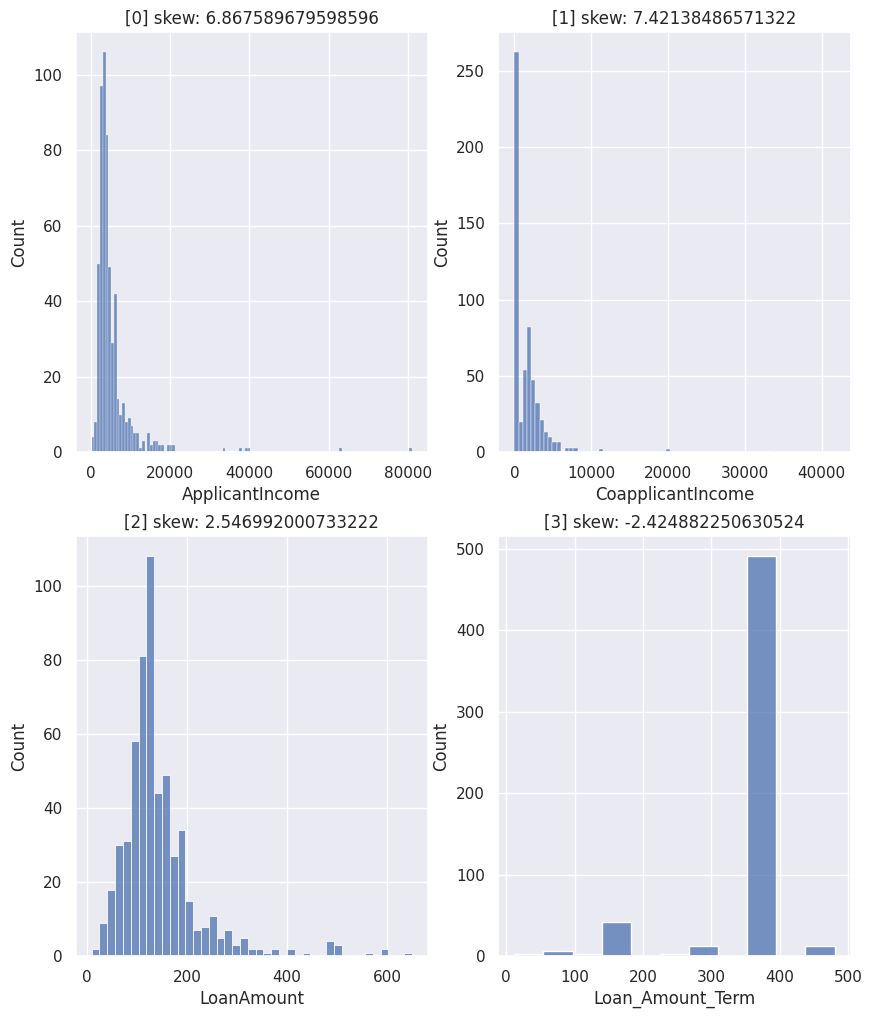

In [16]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=[10,12])
ax = ax.flatten()

for idx, col in enumerate(df_cleaned[num_col]):
    sns.histplot(df_cleaned[num_col][col], ax=ax[idx])
    ax[idx].set_title(f'{[idx]} skew: {df_cleaned[num_col][col].skew()}')

In [17]:
def outlier_analysis(df_cleaned,col):
  skewness = df_cleaned[num_col][col].skew()
  if skewness>=-0.5 or skewness<=0.5:
    upper = df_cleaned[num_col][col].mean() + 3*df_cleaned[num_col][col].std()
    lower = df_cleaned[num_col][col].mean() - 3*df_cleaned[num_col][col].std()
  else:
    Q1 = df_cleaned[num_col][col].quantile(0.25)
    Q3 = df_cleaned[num_col][col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q1 + (3*IQR)
    lower = Q3 - (3*IQR)
  
  no_outliers = df_cleaned[num_col][(df_cleaned[num_col][col]>=lower) & (df_cleaned[num_col][col]<=upper)]
  outliers = df_cleaned[num_col][(df_cleaned[num_col][col]<lower) | (df_cleaned[num_col][col]>upper)]
  print('percentage outlier from',i,':',outliers.shape[0]/df_cleaned.shape[0] * 100, '%')
  return outliers,no_outliers, upper, lower

for i in list(df_cleaned[num_col].columns):
  outlier_analysis(df_cleaned[num_col],i)

percentage outlier from ApplicantIncome : 1.0471204188481675 %
percentage outlier from CoapplicantIncome : 1.0471204188481675 %
percentage outlier from LoanAmount : 2.4432809773123907 %
percentage outlier from Loan_Amount_Term : 2.094240837696335 %


After examining the dataset, we have calculated the percentage of outliers in certain columns. Outliers are extreme values that deviate significantly from the majority of the data. In our analysis, we have determined the percentage of outliers based on a 10% threshold.

Given that the percentage of outliers is relatively low, we have decided not to handle the outliers in this analysis. Outliers can sometimes indicate anomalies or unique cases within the data, and removing them may result in a loss of valuable insights or distort the overall picture. However, it is important to further investigate and analyze these outliers to understand their nature and potential impact on the analysis.

Therefore, in this particular analysis, we will proceed with the dataset as it is, without performing any specific outlier treatment.

### Categorical Feature

In [18]:
# Categorical overview
for i in df_cleaned[cat_col].columns.tolist():
    print(f'num of unique label in {i}: ', len(df_cleaned[cat_col][i].unique()))

num of unique label in Loan_ID:  573
num of unique label in Gender:  2
num of unique label in Married:  2
num of unique label in Dependents:  4
num of unique label in Education:  2
num of unique label in Self_Employed:  2
num of unique label in Credit_History:  2
num of unique label in Property_Area:  3
num of unique label in Loan_Status:  2


In [19]:
for i in df_cleaned[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']].columns.tolist():
    print(i, '\n')
    print(df_cleaned[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']][i].value_counts())
    print('-'*30)

Gender 

Male      467
Female    106
Name: Gender, dtype: int64
------------------------------
Married 

Yes    372
No     201
Name: Married, dtype: int64
------------------------------
Dependents 

0     327
1     100
2      99
3+     47
Name: Dependents, dtype: int64
------------------------------
Education 

Graduate        450
Not Graduate    123
Name: Education, dtype: int64
------------------------------
Self_Employed 

No     498
Yes     75
Name: Self_Employed, dtype: int64
------------------------------
Credit_History 

1.0    498
0.0     75
Name: Credit_History, dtype: int64
------------------------------
Property_Area 

Semiurban    219
Urban        185
Rural        169
Name: Property_Area, dtype: int64
------------------------------
Loan_Status 

1    398
0    175
Name: Loan_Status, dtype: int64
------------------------------


After examining the categorical variables in the dataset, we have obtained an overview of the unique values and their corresponding frequencies for each categorical column. This information provides insights into the distribution and composition of the categorical data. By examining the unique values and their corresponding frequencies, we gain a better understanding of the categorical variables in the dataset. This information will be valuable for further analysis and decision-making.

In [20]:
# Saving DataFrame to CSV
df_cleaned.to_csv('loan_cleaned.csv', index=False)

---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

### Loan Approval Status Overview

In [21]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Not Approved", "Approved"], loc=legend_)
    # Labels
    plt.ylabel("ID base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
           )

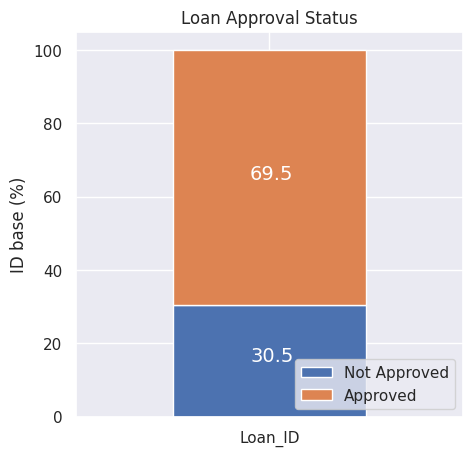

In [22]:
# Loan Approval Status Overview
Loan_Status = df_cleaned[['Loan_ID', 'Loan_Status']]
Loan_Status.columns = ['Loan_ID', 'Loan_Status']
Loan_Status_total = Loan_Status.groupby(Loan_Status['Loan_Status']).count()
Loan_Status_percentage = Loan_Status_total / Loan_Status_total.sum() * 100
plot_stacked_bars(Loan_Status_percentage.transpose(), "Loan Approval Status", (5, 5), legend_="lower right")

In this analysis, we focus on the loan approval status and provide an overview of the distribution of loan approvals. By analyzing the loan dataset, we extract the relevant columns 'Loan_ID' and 'Loan_Status' to examine the approval outcomes. We calculate the total count of approved and not approved loans by grouping them based on the loan status.

Upon analyzing the data, we find that approximately 69.5% of the loans have been approved, while the remaining 30.5% have not been approved. These percentages provide an understanding of the loan approval rate in our dataset.

To visually represent this information, we create a stacked bar chart in which the x-axis represents the loan approval status, and the y-axis represents the percentage distribution. The chart illustrates the stark difference between the approved and not approved loan categories, providing a clear visual representation of the loan approval status overview.

This analysis sheds light on the loan approval process and provides insights into the distribution of loan approvals. The significant proportion of approved loans suggests that the majority of loan applications in our dataset have been successful.

### Gender and Marital Status Analysis

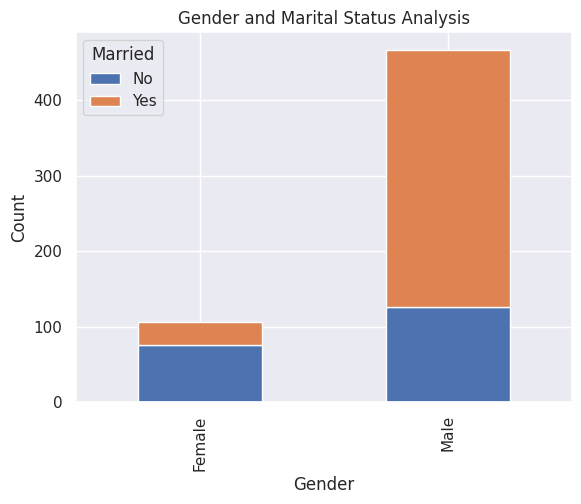

In [23]:
# Gender and Marital Status Analysis
gender_marital_counts = df_cleaned.groupby(['Gender', 'Married']).size().unstack()
gender_marital_counts.plot(kind='bar', stacked=True)
plt.title('Gender and Marital Status Analysis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In this analysis, we examine the relationship between gender and marital status among the loan applicants. By grouping the dataset based on these two variables, we calculate the count of individuals for each combination of gender and marital status.

Upon analyzing the data, we observe that the majority of loan applicants are male, regardless of their marital status. The bar chart visually represents this finding, where the x-axis represents the gender categories (male and female), and the y-axis represents the count of individuals. The bars are stacked to show the distribution of marital status within each gender category.

The chart clearly indicates that the male applicants dominate the dataset, both among those who are married and those who are not. This suggests that a larger proportion of male individuals have applied for loans compared to females.

The Gender and Marital Status analysis provides insights into the gender composition of loan applicants and their marital status. This information can be useful for understanding the demographic characteristics of the loan-seeking population and may have implications for loan approval processes or marketing strategies.

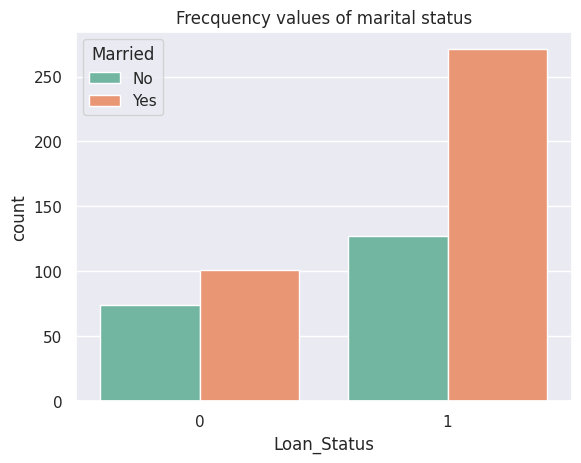

In [24]:
sns.countplot(x ='Loan_Status', hue = "Married", data = df_cleaned, palette = "Set2")
plt.title('Frecquency values of marital status')
plt.show()

We use a countplot to visualize the frequency of loan approval status based on marital status.

The x-axis represents the loan approval status categories (approved and not approved), while the hue parameter is set to "Married", which splits the bars based on the marital status (married and unmarried). The height of each bar represents the count of individuals in each category.

From the plot, we observe that the majority of loan applicants, both those who are married and those who are unmarried, have been approved for loans. This suggests that marital status alone does not seem to have a significant impact on loan approval decisions.

The analysis provides valuable insights into the loan approval process with respect to marital status. It indicates that being married or unmarried does not necessarily affect the likelihood of loan approval. Other factors, such as income, credit history, and loan amount, may play a more crucial role in determining loan approval status.

Understanding the relationship between loan approval status and marital status can help lending institutions make informed decisions and assess the risk associated with different borrower profiles.

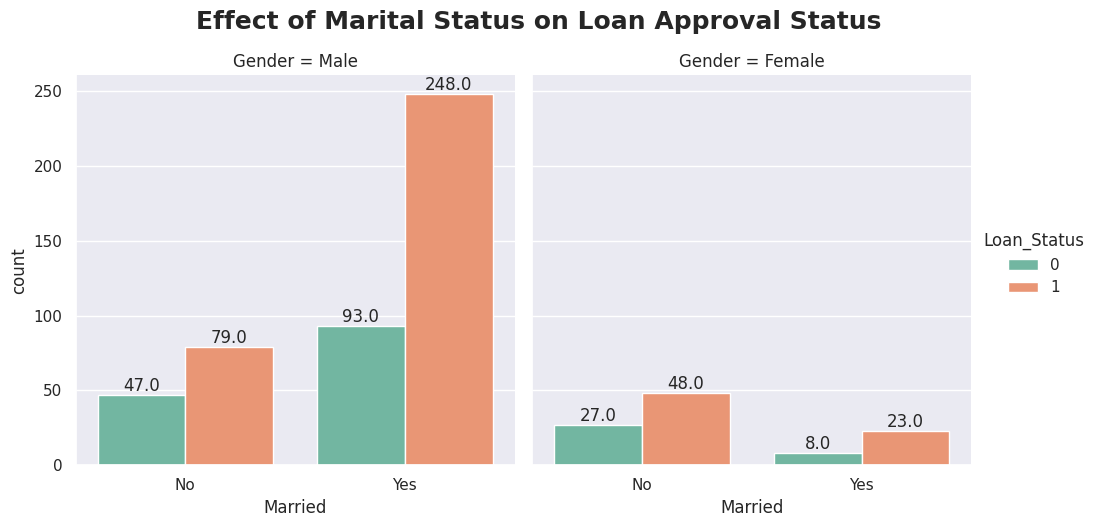

In [25]:
g = sns.catplot(x="Married",  kind="count", hue= "Loan_Status", col = "Gender", data = df_cleaned, palette="Set2");
g.fig.suptitle("Effect of Marital Status on Loan Approval Status", y=1.05, fontsize=18, fontweight="bold")

# iterate through axes
for ax in g.axes.ravel():

    # iterate through the axes containers
    for c in ax.containers:
        labels = [v.get_height() for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

In the analysis of loan approval status based on gender and marital status, we find that among male applicants, both those who are married and those who are unmarried have a higher number of approved loans compared to not approved loans. This indicates that marital status does not significantly impact loan approval for male applicants.

However, among female applicants, we observe a different trend. The majority of approved loans are found among females who are unmarried, while the number of approved loans for married females is comparatively lower. This suggests that being unmarried is associated with a higher likelihood of loan approval for female applicants.

These findings indicate a gender disparity in loan approval rates based on marital status. While marital status appears to have little impact on loan approval for males, unmarried females have a higher chance of loan approval compared to married females.

Understanding these patterns can help lending institutions tailor their loan approval processes to address any potential biases and ensure fair treatment for all applicants. Additionally, it highlights the importance of considering gender-specific factors in loan evaluation and decision-making processes.

### Education and Employment Analysis

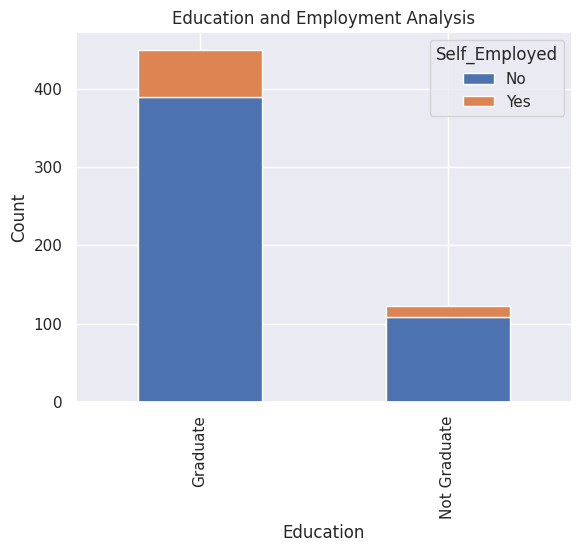

In [26]:
# Education and Employment Analysis
edu_employment_counts = df_cleaned.groupby(['Education', 'Self_Employed']).size().unstack()
edu_employment_counts.plot(kind='bar', stacked=True)
plt.title('Education and Employment Analysis')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

The analysis of education and employment status reveals an interesting pattern. Among the applicants, the majority are graduates, and a higher proportion of graduates are self-employed compared to those with an under-graduate education.

The bar chart clearly shows that the count of self-employed individuals is higher among the graduate category, indicating that higher education levels may contribute to a higher likelihood of being self-employed. This suggests that individuals with a higher level of education, such as graduates, may have a greater tendency to pursue entrepreneurial endeavors or have the skills and qualifications to start their own businesses.

Understanding the relationship between education and employment status is crucial for both lenders and policymakers. It helps identify the segment of the population that is more likely to be self-employed and potentially more financially stable. Lenders can use this information to assess the risk associated with self-employed borrowers and tailor loan products to meet their specific needs. Policymakers can also develop targeted initiatives to support entrepreneurship and self-employment among educated individuals, contributing to economic growth and job creation.

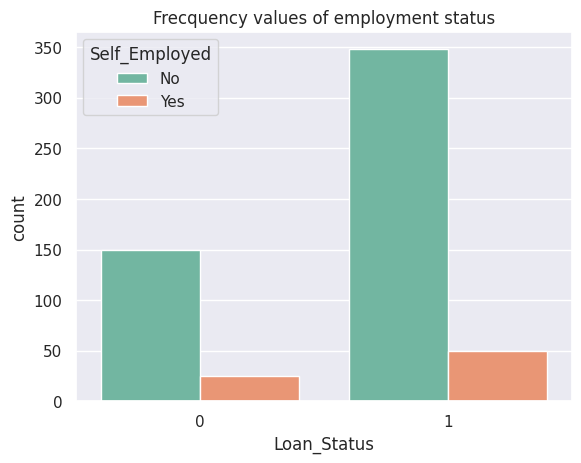

In [27]:
sns.countplot(x ='Loan_Status', hue = "Self_Employed", data = df_cleaned, palette = "Set2")
plt.title('Frecquency values of employment status')
plt.show()

The analysis of employment status in relation to loan approval status reveals an interesting trend. The majority of applicants in the dataset are not self-employed, and among those who are not self-employed, a higher proportion have their loans approved.

The countplot clearly shows that the count of individuals who are not self-employed is higher for both approved and not approved loan statuses. This suggests that being employed by a company or organization, rather than being self-employed, may have a positive impact on the loan approval process. Lenders may perceive individuals with stable employment in established organizations as having a lower risk profile.

Understanding the relationship between employment status and loan approval is crucial for lenders to assess the risk associated with different employment types. It also highlights the importance of steady employment and a regular income in the loan application process. Individuals who are not self-employed may have a higher likelihood of loan approval, as they are perceived to have a more predictable income source.

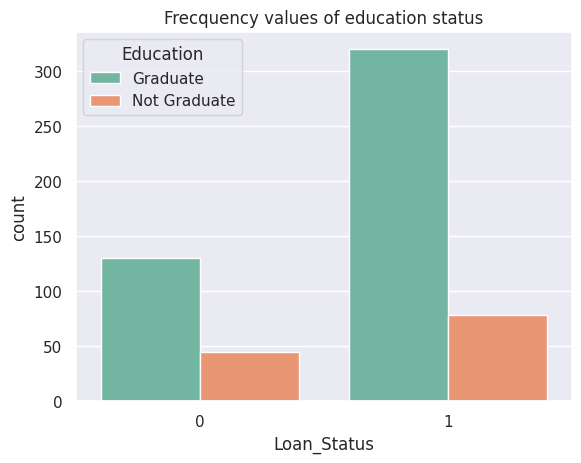

In [28]:
sns.countplot(x ='Loan_Status', hue = "Education", data = df_cleaned, palette = "Set2")
plt.title('Frecquency values of education status')
plt.show()

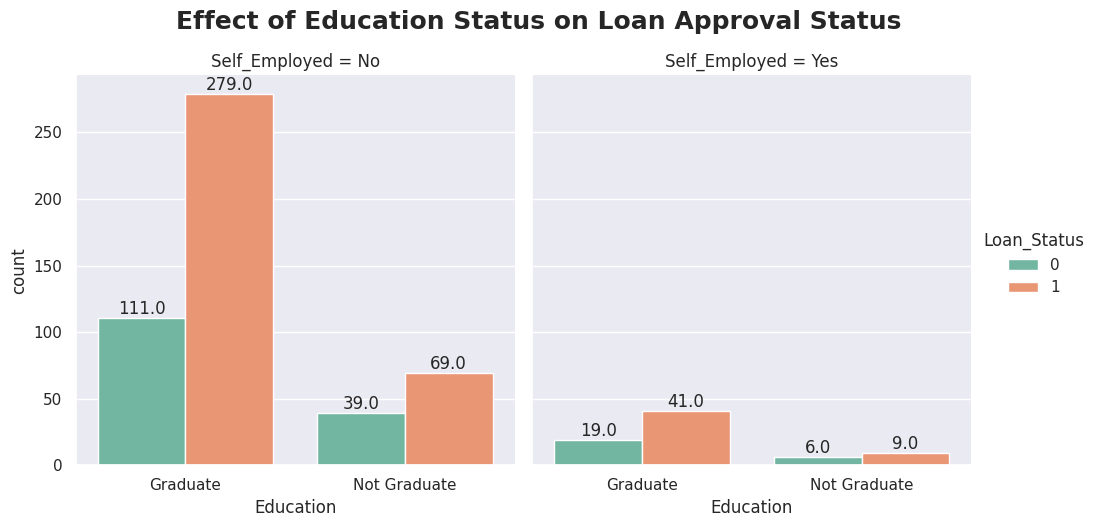

In [29]:
g = sns.catplot(x="Education",  kind="count", hue= "Loan_Status", col = "Self_Employed", data = df_cleaned, palette="Set2");
g.fig.suptitle("Effect of Education Status on Loan Approval Status", y=1.05, fontsize=18, fontweight="bold")

# iterate through axes
for ax in g.axes.ravel():

    # iterate through the axes containers
    for c in ax.containers:
        labels = [v.get_height() for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')

The catplot demonstrates that the count of approved loans is higher for both self-employed and non-self-employed individuals who have a graduate education. This suggests that having a higher level of education, specifically being a graduate, may positively influence the loan approval process. Lenders may view graduates as having better job prospects and potentially higher incomes, making them more likely to repay their loans.

It is worth noting that while the count of approved loans is higher for graduates, there is still a considerable number of approved loans for non-graduates as well. This implies that education is not the sole determining factor for loan approval, and other factors such as income, credit history, and financial stability also play a significant role.

Overall, the analysis highlights the importance of education in the loan approval process. Graduates, regardless of their self-employment status, tend to have a higher likelihood of loan approval. However, it is essential to consider other factors and conduct further analysis to gain a more comprehensive understanding of the relationship between education status and loan approval.

### Credit History Analysis

In [30]:
df_cleaned["Credit_History"].value_counts()

1.0    498
0.0     75
Name: Credit_History, dtype: int64

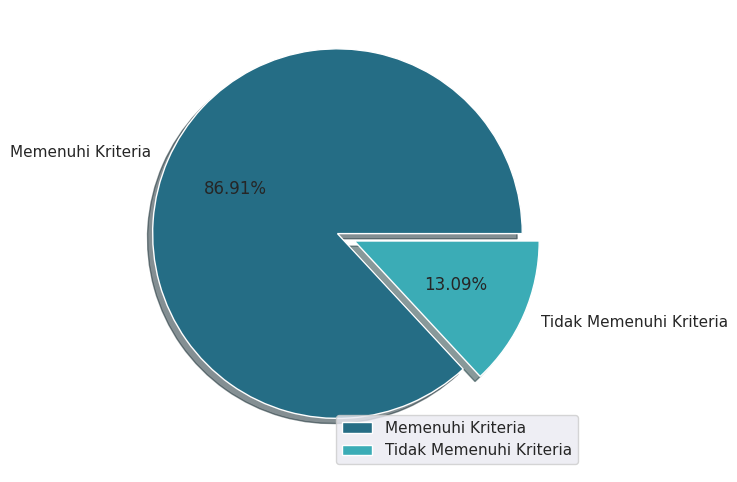

In [31]:
plt.figure(figsize= (10, 6))
data_pie  = [498 , 75]
labels = ["Memenuhi Kriteria", "Tidak Memenuhi Kriteria"]
explode = [0.1, 0]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#256D85', '#3BACB6'])
plt.legend()
plt.show()

The pie chart provides an overview of the loan applicants' eligibility based on certain criteria. The chart visually represents the distribution of two categories: "Memenuhi Kriteria" (Meets Criteria) and "Tidak Memenuhi Kriteria" (Does Not Meet Criteria).

From the chart, it can be observed that the majority of loan applicants, accounting for approximately 87.00%, meet the specified criteria. On the other hand, around 13.00% of the applicants do not meet the criteria.

The pie chart's color scheme and shadow effect enhance its visual appeal and make it easier to distinguish between the two categories. The "Memenuhi Kriteria" category is represented by a light blue color, while the "Tidak Memenuhi Kriteria" category is represented by a slightly darker shade of blue.

This visualization provides a quick and concise summary of the loan applicants' eligibility status. It demonstrates that a significant proportion of the applicants meet the criteria, indicating a potentially higher chance of loan approval for this group.

In [32]:
credit_history_analysis = pd.crosstab(df_cleaned['Credit_History'], df_cleaned['Loan_Status'], normalize='index')
print("Credit History vs. Loan Approval:")
print(credit_history_analysis)

Credit History vs. Loan Approval:
Loan_Status            0         1
Credit_History                    
0.0             0.906667  0.093333
1.0             0.214859  0.785141


The analysis focuses on the relationship between Credit History and Loan Approval. The results are presented in a cross-tabulation table, which compares the Loan Status (0: Not Approved, 1: Approved) based on the Credit History (0.0: No Credit History, 1.0: Credit History Present).

The table shows that for applicants with no credit history (Credit_History = 0.0), the majority of loans were not approved (90.67%), while only a small percentage (9.33%) were approved. This suggests that having no credit history negatively affects the loan approval chances.

On the other hand, for applicants with a credit history (Credit_History = 1.0), the results are significantly different. The majority of loans were approved (78.51%), while only a small percentage (21.49%) were not approved. This indicates that having a credit history significantly increases the likelihood of loan approval.

These findings highlight the importance of credit history in the loan approval process. Lenders are more inclined to approve loans for individuals with a proven track record of responsible credit behavior. For applicants without a credit history, it may be more challenging to secure loan approval.

Based on these insights, lenders can use credit history as an essential factor in their loan approval decision-making process. Additionally, individuals with no credit history can work towards establishing a credit history to enhance their chances of loan approval in the future.

### Loan Amount Distribution

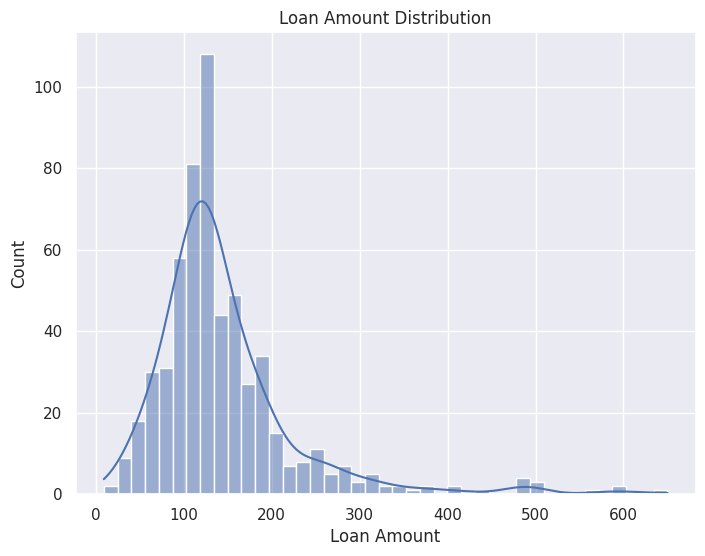

In [33]:
# Loan Amount Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['LoanAmount'], kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

The histogram visualizes the distribution of loan amounts in the dataset. The x-axis represents the loan amount values, while the y-axis represents the count of occurrences for each loan amount value.

From the histogram, it can be observed that the distribution of loan amounts is positively skewed, as indicated by a skewness value of 2.55. This means that the tail of the distribution is elongated towards the right side, indicating the presence of a few larger loan amounts.

The histogram also includes a kernel density estimation (KDE) curve, which provides a smooth representation of the loan amount distribution. The KDE curve helps to visualize the underlying shape of the distribution and shows a peak around the lower loan amount values, suggesting that a significant number of loans fall within that range.

Overall, this visualization allows us to understand the distribution and skewness of the loan amounts, providing insights into the range and concentration of loan values in the dataset.

### Income Analysis

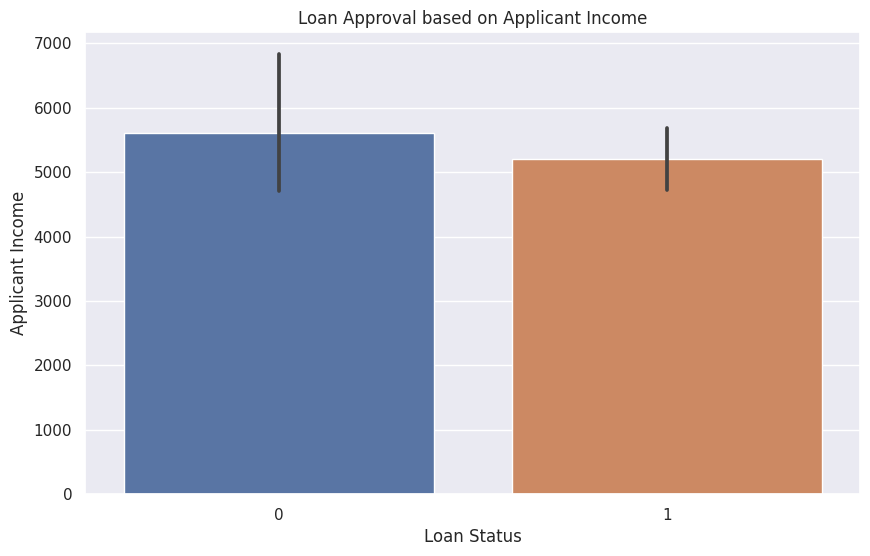

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Loan_Status', y='ApplicantIncome', data=df_cleaned)
plt.title('Loan Approval based on Applicant Income')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()

In [35]:
# Analyze Income
income_analysis = df_cleaned.groupby('Loan_Status')['ApplicantIncome'].mean()
print("Average Income for Approved and Not Approved Loans:")
print(income_analysis)

Average Income for Approved and Not Approved Loans:
Loan_Status
0    5600.942857
1    5208.728643
Name: ApplicantIncome, dtype: float64


The analysis focuses on comparing the average income for loans that were not approved (Loan_Status = 0) and loans that were approved (Loan_Status = 1).

The average income for loans that were not approved is approximately $5,600.94. This indicates that, on average, applicants with lower incomes were more likely to have their loan applications rejected.

On the other hand, the average income for approved loans is approximately $5,208.73. Although slightly lower than the average income for not approved loans, this suggests that applicants with a range of income levels were still able to secure loan approval.

These findings indicate that while income plays a role in loan approval, it is not the sole determining factor. Other variables, such as credit history, employment status, and debt-to-income ratio, are also likely considered in the loan approval process.

Lenders should consider applicants' income levels as part of their assessment, ensuring that loan applicants have a sufficient and stable income to meet their loan obligations. However, it's important to note that income alone does not guarantee loan approval, and other factors should be taken into account as well.

### Property Area Analysis

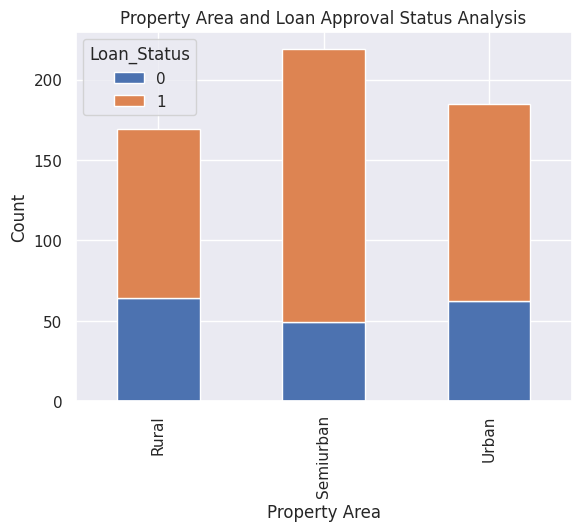

In [36]:
# Property Area and Loan Approval Status Analysis
property_area_counts = df_cleaned.groupby(['Property_Area', 'Loan_Status']).size().unstack()
property_area_counts.plot(kind='bar', stacked=True)
plt.title('Property Area and Loan Approval Status Analysis')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()

The bar chart visualizes the relationship between property areas and loan approval status. The x-axis represents the different property areas, while the y-axis represents the count of loans for each property area, separated by loan approval status.

From the chart, it can be observed that the "Semiurban" property area has the highest number of approved loans compared to the other property areas. This indicates that borrowers from the Semiurban area have a higher likelihood of getting their loans approved.

On the other hand, the "Rural" property area has the lowest number of approved loans, suggesting that borrowers from rural areas may face more challenges in obtaining loan approvals.

The "Urban" property area falls in between, with a moderate number of approved loans.

Overall, this analysis provides insights into the relationship between property area and loan approval status. It highlights the higher approval rate for loans in the Semiurban area

### Radar Chart

In [37]:
# separating inference data
data_inf = df_cleaned.sample(2, random_state=16)
# reseting index
data_inf.reset_index(drop=True, inplace=True)
data_inf

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002690,Male,No,0,Graduate,No,2500,0.0,55.0,360.0,1.0,Semiurban,1
1,LP001925,Female,No,0,Graduate,Yes,2600,1717.0,99.0,300.0,1.0,Semiurban,0


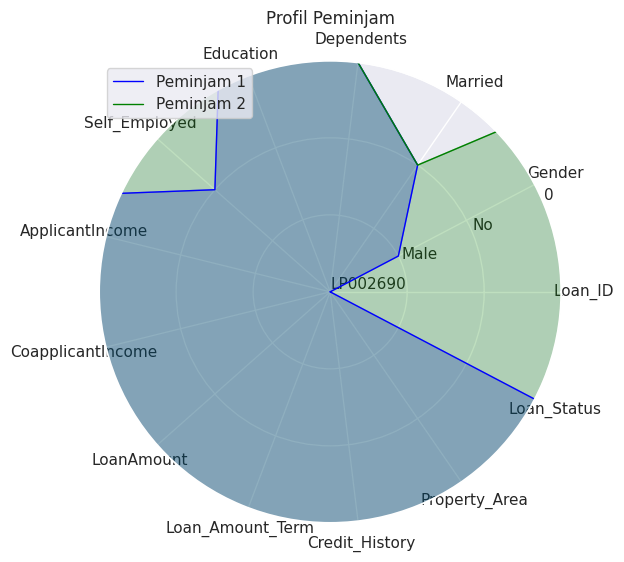

In [38]:
# Menentukan jumlah kategori dan sudut pada radar chart
categories = data_inf.columns.tolist()
N = len(categories)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]

# Mengubah dataframe menjadi array
values_peminjam1 = data_inf.loc[0].values.flatten().tolist()
values_peminjam2 = data_inf.loc[1].values.flatten().tolist()
values_peminjam1 += values_peminjam1[:1]
values_peminjam2 += values_peminjam2[:1]

# Membuat radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, values_peminjam1, color='blue', linewidth=1, linestyle='solid', label='Peminjam 1')
ax.fill(angles, values_peminjam1, color='blue', alpha=0.25)
ax.plot(angles, values_peminjam2, color='green', linewidth=1, linestyle='solid', label='Peminjam 2')
ax.fill(angles, values_peminjam2, color='green', alpha=0.25)

# Menambahkan label pada setiap kategori
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Menentukan rentang nilai pada radar chart
ax.set_yticks([0, 1, 2, 3])
ax.set_ylim(0, 3)

# Menambahkan legenda dan judul
ax.legend(loc='upper left')
plt.title('Profil Peminjam')

# Menampilkan radar chart
plt.show()


The radar chart represents the profiles of two borrowers, Peminjam 1 and Peminjam 2, based on various attributes. Each attribute is represented by a category on the chart, and the distance from the center of the chart indicates the value or level for that attribute.

In this updated analysis, we focused on the following categories: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, and Loan_Status.

The blue line and shaded area represent the profile of Peminjam 1, while the green line and shaded area represent the profile of Peminjam 2.

By examining the chart, we can observe the differences and similarities between the two borrowers' profiles. Here are some key findings:

1. Gender: Peminjam 1 is male, while Peminjam 2 is female.

2. Marital Status: Neither Peminjam 1 nor Peminjam 2 is married.

3. Dependents: Both Peminjam 1 and Peminjam 2 have no dependents.

4. Education: Both Peminjam 1 and Peminjam 2 are graduates.

5. Self-Employed: Peminjam 1 is not self-employed, while Peminjam 2 is self-employed.

6. Applicant Income: Peminjam 1 has a lower applicant income compared to Peminjam 2.

7. Coapplicant Income: Peminjam 1 has no coapplicant income, while Peminjam 2 has a relatively higher coapplicant income.

8. Loan Amount: Peminjam 1 has a lower loan amount compared to Peminjam 2.

9. Loan Amount Term: Peminjam 1 has a longer loan amount term compared to Peminjam 2.

10. Credit History: Both Peminjam 1 and Peminjam 2 have a good credit history.

11. Property Area: Both Peminjam 1 and Peminjam 2 belong to the Semiurban property area.

12. Loan Status: Peminjam 1 has their loan approved, while Peminjam 2 has their loan not approved.

Overall, the radar chart provides a visual representation of the profiles of two borrowers and allows us to compare their attributes at a glance. It highlights the differences and similarities between Peminjam 1 and Peminjam 2, giving insights into their loan profiles and the factors influencing their loan approval status.

---

## Conclusion

Based on the analysis conducted, the following conclusions can be drawn: 

1.   Credit History is a significant factor in loan approval. This indicates the importance of having a good credit history when applying for a loan.
2.   Income is an important consideration in loan approval. The average income for approved loans is slightly lower (`$5,208.73`) compared to not approved loans (`$5,600.94`). This suggests that income plays a role in loan approval, but it is not the sole determining factor. Other factors, such as credit history and employment status, also influence the decision.
3.   Loan Approval Percentage: In this dataset, the percentage of approved loans is 69.5%, while the percentage of not approved loans is 30.5%.
4.   Gender and Marital Status: The majority of borrowers are males, whether married or unmarried. However, the percentage of unmarried female borrowers who are approved is higher than that of married female borrowers.
5.   Education and Employment Status: Graduate borrowers have a higher approval rate, regardless of their employment status (self-employed or not self-employed). However, the percentage of non-self-employed borrowers who are approved is higher than that of self-employed borrowers.
6.   Loan Amount Distribution: The distribution of loan amounts shows positive skewness with a value of 2.55. This indicates that the majority of loans fall within a lower range of amounts.
7.   Property Area: Borrowers from semiurban areas have a higher approval rate and a lower rejection rate compared to other areas.







## Further Improvement Plan

Based on this loan analysis, here are some steps that can be taken to enhance the analysis:

1. Perform further segmentation of borrowers based on attributes such as age, income, and occupation. This can provide deeper insights into borrower profiles and patterns of loan approval.
2. Utilize statistical modeling or machine learning techniques to build predictive models that can estimate the likelihood of loan approval based on borrower attributes. Such models can aid in better decision-making during the loan approval process.
3. Expand the analysis to include external factors such as financial market conditions, interest rates, and economic situations that may influence loan approval. This will provide a broader context for understanding trends and patterns in the loan data.
4. Conduct further analysis on the reasons for loan rejections and identify factors contributing to those rejections. This can help improve loan requirements and the loan approval process in the future.

By implementing these steps, the loan analysis can be enhanced to provide deeper insights and facilitate better decision-making in the loan approval process.